# **Discreataization**
Discreataization is the preprocessing technique used to transfrom the continous or
numarical data into discrete data or bins.this process can particulerly usefull for machine 
learning algorithems that handle categorical data more effiently than numarical data or 
continous data.it also helps to improve model interprelebility and handle outlier more
robustly. 

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# checking the missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [4]:
# here to impute the missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [5]:
# age discretiazation
age_discretizer=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
df['age_bins'] = age_discretizer.fit_transform(df[['age']])
df.head()

c:\Users\hp\miniconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age', ylabel='Count'>

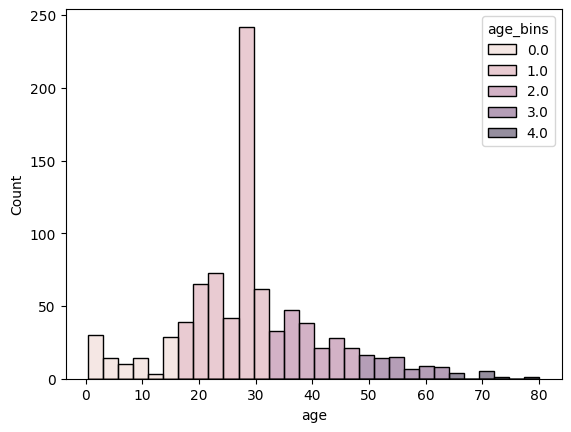

In [6]:
# making the hisplot of the bins
sns.histplot(df,x='age',hue = 'age_bins')

<Axes: xlabel='age', ylabel='Count'>

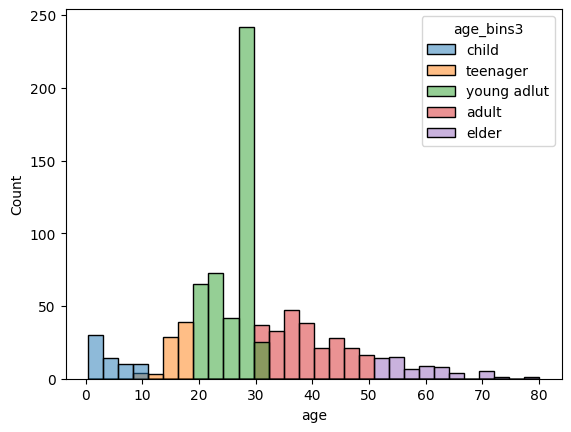

In [7]:
# binng manullay using pandas library
bins = [0,10,18,30,50,80]
# labels
labels = ['child','teenager','young adlut','adult','elder']
df['age_bins3'] = pd.cut(df['age'],bins=bins,labels=labels)
# now making thier hisplot
sns.histplot(df,x='age',hue='age_bins3')